In [1]:
import numpy as np # linear algebra
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.metrics import mean_squared_error


In [2]:
cd = pd.read_csv("emissiondata.csv")         

cd.drop_duplicates(inplace=True)

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [4]:
#x=cd[high_corr_features.drop('SalePrice')]  # lets not use the only high corr features since it will be v less.

x=cd.drop(['CO (mg/m3)','NOX'], axis=1)
y=cd[['CO (mg/m3)']]


In [5]:
xtr, xte, ytr, yte = train_test_split(x, y, test_size=0.25, random_state=42)

In [6]:
scaler = StandardScaler()
xs_train=scaler.fit_transform(xtr)
xs_test=scaler.fit_transform(xte)


In [7]:
from sklearn.ensemble import GradientBoostingRegressor


In [8]:
## loop over tree size
#nbotv = np.arange(5,51)
#nbot = len(nbotv)

nbotv = [50,100,200,500,750,1000,2000,3000,5000]
nbot = [0,1,2,3,4,5,6,7,8]
nbot_len =len(nbot)
nbot


irms = np.zeros((nbot_len,))
orms = np.zeros((nbot_len,))

In [9]:
for i,j in zip(nbotv,nbot):
    gbee = GradientBoostingRegressor(n_estimators= i,max_depth= 3,min_samples_split= 5,learning_rate= 0.1,loss= 'ls')
    gbee.fit(xtr,ytr)
    ypred_tr_new = gbee.predict(xtr)
    ypred_te_new = gbee.predict(xte)
    orms[j] = math.sqrt(mean_squared_error(yte,ypred_te_new))
    irms[j] = math.sqrt(mean_squared_error(ytr,ypred_tr_new))



/Users/anirudhnandakumar/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/anirudhnandakumar/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/anirudhnandakumar/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/Users/anirudhnandakumar/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed 

Text(0, 0.5, 'Rmse, out of sample (red)')

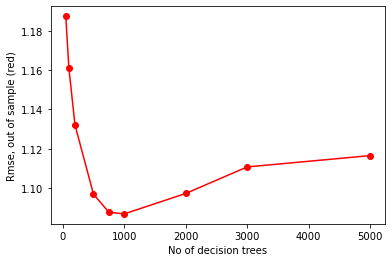

In [10]:
plt.plot(nbotv,orms,'-ok',c='r')
plt.xlabel('No of decision trees')
plt.ylabel('Rmse, out of sample (red)')

In [11]:
for d in range(nbot_len):
    print(nbotv[d]," ",orms[d])


50   1.1873975691469398
100   1.1610838352081165
200   1.1319523856270874
500   1.0968750058830306
750   1.0876738030423998
1000   1.0867963882042422
2000   1.0972125173234943
3000   1.1107076823343647
5000   1.116472753560612


In [12]:
gbrq_params = {'n_estimators': 1000,
          'max_depth': 3,
          'min_samples_split': 5,
          'learning_rate': 0.1,
          'loss': 'ls'}
#
# Create an instance of gradient boosting regressor
#
gbrq = GradientBoostingRegressor(**gbrq_params)
#
# Fit the model
#
gbrq.fit(xtr, ytr)
#
# Print Coefficient of determination R^2
#
print("Model Accuracy: %.3f" % gbrq.score(xte, yte))
#
# Create the mean squared error
#
rmse_tr2 = math.sqrt(mean_squared_error(ytr, gbrq.predict(xtr)))

rmse_te2 = math.sqrt(mean_squared_error(yte, gbrq.predict(xte)))

print("The root mean squared error (MSE) on train set: {:.4f}",format(rmse_tr2))
                    
print("\nThe root mean squared error (MSE) on train set: {:.4f}",format(rmse_te2))


/Users/anirudhnandakumar/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Model Accuracy: 0.776
The root mean squared error (MSE) on train set: {:.4f} 0.7698645406430275

The root mean squared error (MSE) on train set: {:.4f} 1.0857170892995005
